<img src="https://i.imgur.com/6U6q5jQ.png"/>







# Graphs

Let me show you a graph (from [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

As you can see, it is simply a representation of two sets:

1. A set of **vertices** or **nodes**. In the image above you see the nodes _1_, _2_, _3_, _4_, _5_, and _6_.
2. A set of **edges** or **links**. In the image above, the links are connecting pairs of nodes. 

Altogether, a _graph_ reveals some _relationship_ among the _nodes_. The graph structure will allow us to explore and understand that relationship. 

## Creating Graphs

The graph above can be represented computationally in Python using **networkx**:

In [1]:
import networkx as nx

# create graph
G = nx.Graph()

# create nodes and edges
G.add_edges_from([(1, 2), (1, 5),(2,5),(2,3),(3,4),(4,5),(4,6)])

## Basic Elements

**G** is the graph:

In [2]:
#you don't see much...just what it is:
G

In [3]:
# You see nodes
G.nodes.data()

NodeDataView({1: {}, 2: {}, 5: {}, 3: {}, 4: {}, 6: {}})

In [4]:
# You see node ids
G.nodes()

NodeView((1, 2, 5, 3, 4, 6))

In [6]:
# similar
G.nodes().values()

ValuesView(NodeView((1, 2, 5, 3, 4, 6)))

In [9]:
# You see edges
G.edges()

EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)])

In [10]:
# You see edges items
G.edges().items()

ItemsView(EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)]))

## Drawing

As you can see, the graph is created by adding pairs of nodes. Once you complete that stage, you can draw the graph:

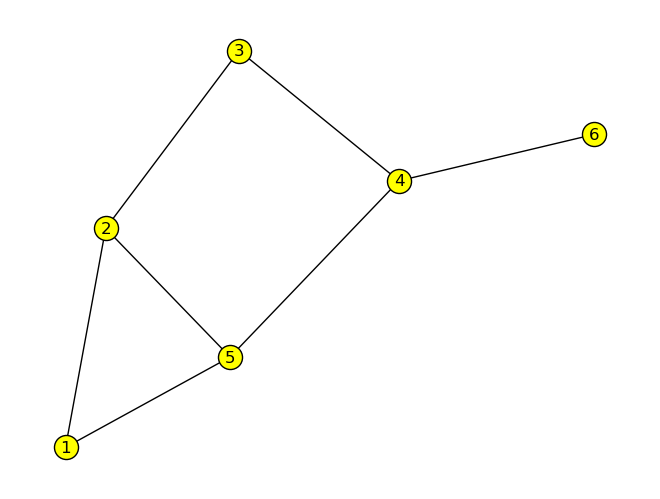

In [33]:
# draw
nx.draw(G=G,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

Notice that the position of the nodes will vary every time you re draw the graph. In fact, drawing a graph can become a challenge by itself when we need to find information via visualization. 


## Interaction with Pyvis

Pyvis uses color, size, label and title attributes.

In [26]:
# dict of labels
labels={i:str(i) for i in G.nodes()}
labels # string as label

{1: '1', 2: '2', 5: '5', 3: '3', 4: '4', 6: '6'}

In [29]:
nx.set_node_attributes(G,labels,'label') # values according to id
nx.set_node_attributes(G,'red','color') # for all
G.nodes.data()

NodeDataView({1: {'label': '1', 'color': 'red'}, 2: {'label': '2', 'color': 'red'}, 5: {'label': '5', 'color': 'red'}, 3: {'label': '3', 'color': 'red'}, 4: {'label': '4', 'color': 'red'}, 6: {'label': '6', 'color': 'red'}})

In [30]:
from pyvis.network import Network

Gvis = Network('500px', '500px',notebook=True,cdn_resources='remote')
Gvis.from_nx(G.copy()) # create a copy!
Gvis.show('Gvis.html')



### Edge directionality

The graph we created and drew represented an **undirected** graph, that is, the relationships between a pair of nodes are **symmetric**: the relationships can not represent direction because they are _inherently mutual_ between the nodes. For example, the relationship *to be a neighbor of* is symmetric.

The following graph is **directed** (also from wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Directed_graph_no_background.svg/340px-Directed_graph_no_background.svg.png"/>


You can create this directed graph this way:

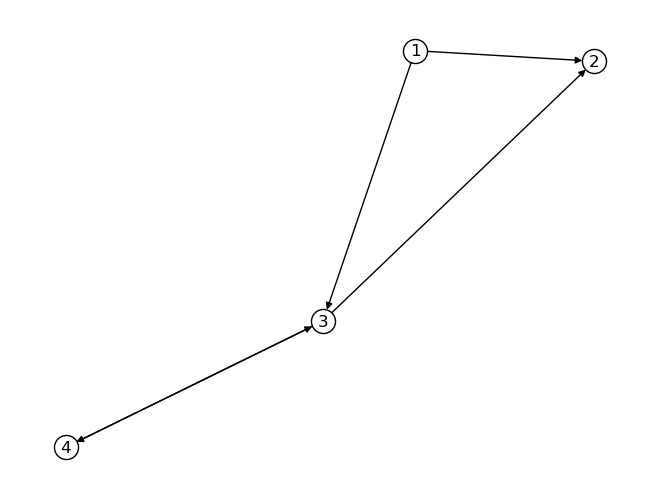

In [31]:
# create graph
dG = nx.DiGraph()

# create nodes and edges
dG.add_edges_from([(1, 2), (1, 3),(3,2),(3,4),(4,3)])

# drawing
nx.draw(dG,with_labels=True,node_color='white',edgecolors='black')

Directed links are also called **arcs**. Notice the _DiGraph_ created represents an **asymmetric** relationship: the relationship a node has with another node does not need to be mutual, but could be (see nodes _3_ and _4_). If the arcs represent **cares for someone**, it shows that the feeling is not reciprocal for most cases in this graph. If a relationship is not mutual, and can only be in one direction, it is called **anti symmetric**.

## Attributes

Nodes can have attributes:

In [34]:
# adding attributes
dG.nodes[1]["sex"]='male'
dG.nodes[2]["sex"]='male'
dG.nodes[3]["sex"]='female'
dG.nodes[4]["sex"]='female'

In [35]:
# seeing attributes
nx.get_node_attributes(dG, "sex")

{1: 'male', 2: 'male', 3: 'female', 4: 'female'}

Set the color of the node based on sex:

In [40]:
#if 
nx.get_node_attributes(dG, "sex").items()

dict_items([(1, 'male'), (2, 'male'), (3, 'female'), (4, 'female')])

In [41]:
# then
{i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

{1: 'blue', 2: 'blue', 3: 'red', 4: 'red'}

In [42]:
# so...
colors={i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

# set color
nx.set_node_attributes(dG, colors, "color")
dG.nodes.data()

NodeDataView({1: {'sex': 'male', 'color': 'blue'}, 2: {'sex': 'male', 'color': 'blue'}, 3: {'sex': 'female', 'color': 'red'}, 4: {'sex': 'female', 'color': 'red'}})

In [43]:
# since
nx.get_node_attributes(dG, "color").values()

dict_values(['blue', 'blue', 'red', 'red'])

Attributes can serve for some computational purposes, but also help to visually find structures.

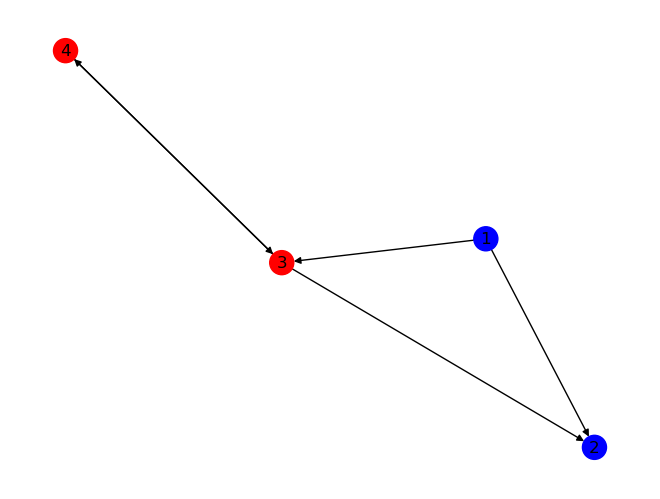

In [44]:
# using node attributes

nx.draw(dG,
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

Of course, edges can have attributes too:

In [45]:
dG.edges[(1, 2)]['weight']=1
dG.edges[(1, 3)]['weight']=3
dG.edges[(3, 2)]['weight']=5
dG.edges[(3, 4)]['weight']=10
dG.edges[(4, 3)]['weight']=0.5

In [46]:
# see them
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 3}), (3, 2, {'weight': 5}), (3, 4, {'weight': 10}), (4, 3, {'weight': 0.5})])

Let me add another attribute conditional on another attribute:

In [47]:
# if
{i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}

{(1, 2): 'grey',
 (1, 3): 'grey',
 (3, 2): 'grey',
 (3, 4): 'grey',
 (4, 3): 'magenta'}

In [48]:
# then
colorEdges={i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG,values=colorEdges,name='color')

In [49]:
# see edges and attributes
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1, 'color': 'grey'}), (1, 3, {'weight': 3, 'color': 'grey'}), (3, 2, {'weight': 5, 'color': 'grey'}), (3, 4, {'weight': 10, 'color': 'grey'}), (4, 3, {'weight': 0.5, 'color': 'magenta'})])

Let's use edge attributes:

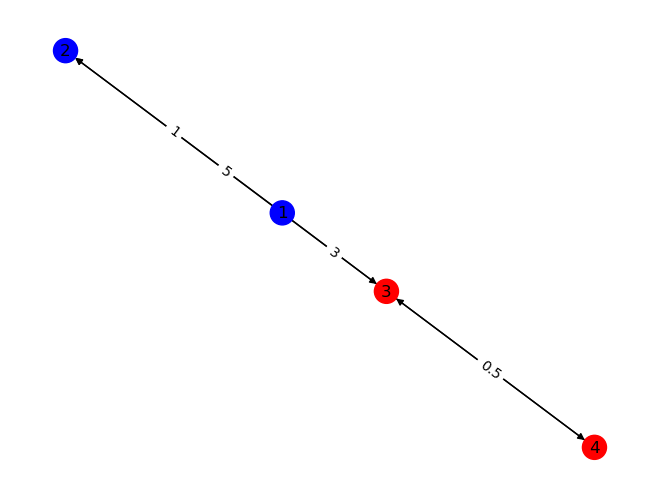

In [52]:
# use the edge attributes
# add labels to edges
            
pos = nx.spring_layout(dG) # position of the nodes

nx.draw(dG,
        pos, # using "position"
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

# adding labels
final_dG=nx.draw_networkx_edge_labels(dG,pos,edge_labels=nx.get_edge_attributes(dG,'weight'))

The color of edges:

In [54]:
nx.get_edge_attributes(dG,'color').values()

dict_values(['grey', 'grey', 'grey', 'grey', 'magenta'])

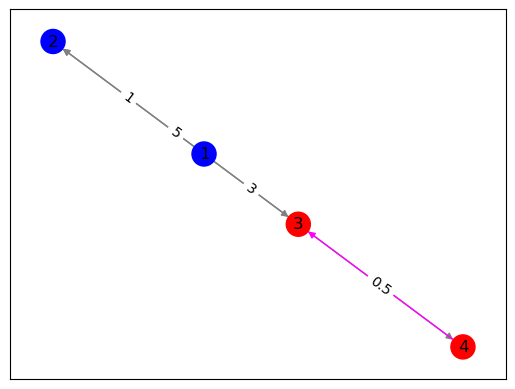

In [55]:
# use the edge attributes
# add labels to edges
# add color to edges

edge_colors=nx.get_edge_attributes(dG,'color').values()
colors_for_nodes=nx.get_node_attributes(dG,'color').values()
weight_values=nx.get_edge_attributes(dG,'weight')
pos = nx.spring_layout(dG) 

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=colors_for_nodes)
# draw edges
nx.draw_networkx_edges(dG, pos,
                       edge_color= edge_colors)
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,
                               edge_labels=weight_values)

The interactive version needs labels, we don't have them yet:

In [100]:
dG.nodes.data()[1].keys()

dict_keys(['sex', 'color'])

In [123]:
[i[2].keys() for i in dG.edges.data()][0]

dict_keys(['weight', 'color'])

In [124]:
# id as label
labels={i:str(i) for i in dG.nodes()}
nx.set_node_attributes(dG, labels, "label")

# weight as label
labels={e:str(v) for e,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG, labels, "label")

In [126]:
dGvis = Network('500px', '500px',notebook=True,cdn_resources='in_line',directed=True)
dGvis.from_nx(dG.copy())
dGvis.show('dGvis.html')

## Exporting

Network does not recommend its use for complex visualization. So, several times you may want to export your graph to be visualize in Gephi or something similar:

In [ ]:
nx.write_graphml(dG, "dG.graphml",encoding='utf-8')

# Case: Elites in Peru

The network we are going to build is based on the relationships studied in this paper:
<img src="graphdata/paper.png" width="900">


In that paper, Professor Figueroa shows this table, where 1 represents that both nodes (families) appear together at least once in a top company board. Notice the last column is an attribute:

<img src="graphdata/dataRed.png" width="900">

This is an spreadsheet, representing the information above:

<img src="graphdata/dataExcel.png" width="900">

Let's use the data from the spreadsheet to prepare our table:

In [127]:
# reading in
import pandas as pd
import os

FigueData = pd.read_excel(os.path.join("graphdata","dataFigueroa.xlsx"),
                          index_col=0) #notice!!!!!

We got this:

In [128]:
FigueData.head()

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila,Multinacional
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


As intended, the family appears as the row index (not the first column of data). The family is also the column names:

In [129]:
FigueData.columns

Index(['Romero', 'Graña', 'Miro Quesada', 'Moreyra', 'Fort', 'De La Puente',
       'Wiese', 'Onrubia', 'Brescia', 'Nicolini', 'Montero', 'Picaso',
       'Bentin', 'Benavides', 'Bustamante', 'Woodman Pollit', 'Raffo',
       'Piazza', 'Berckemeyer', 'Llosa Barber', 'Beoutis Ledesma',
       'Rizo Patron', 'Montori', 'Sotomayor', 'Cilloniz', 'Ferreyros',
       'Michell', 'Wong Lu', 'Batievsky Spack', 'Matos Escalada', 'Galsky',
       'Lucioni', 'Rodriguez Rodríguez', 'Custer', 'Ikeda', 'Cogorno',
       'Arias Davila', 'Multinacional'],
      dtype='object')

The **adjacency matrix** does not need the attribute column, then:

In [130]:
varsToDrop=['Multinacional']
adjacency=FigueData.drop(varsToDrop,axis=1) 

#result
adjacency

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Wong Lu,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
De La Puente,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wiese,0,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Onrubia,1,0,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Brescia,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Nicolini,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


It is easy to turn the adjacency matrix into a graph:

In [131]:
EliteNet = nx.from_pandas_adjacency(adjacency)

Take a look at **EliteNet**:

In [132]:
# nodes:
len(EliteNet)

37

In [133]:
# edges:
EliteNet.size()

172

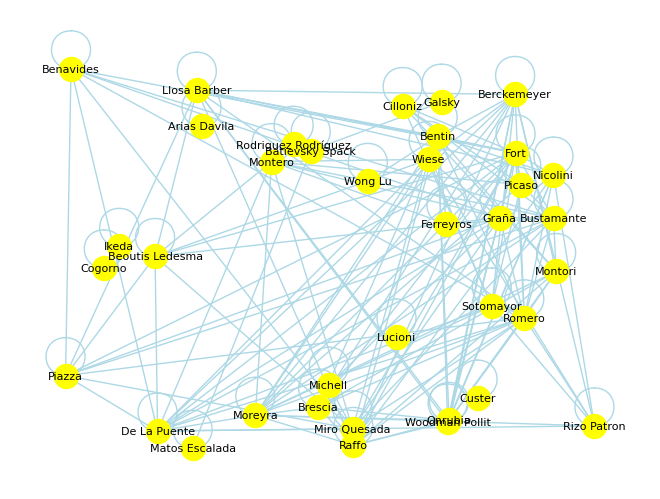

In [134]:
# plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

The adjacency include the self-relationships, we should take those away:

In [135]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

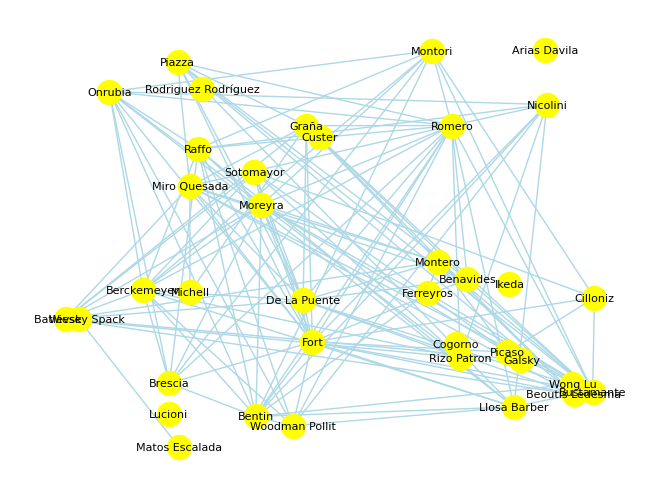

In [136]:
# re plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Let's add the attributes to the nodes:

In [137]:
FigueData['Multinacional'].head()

Romero          1
Graña           1
Miro Quesada    1
Moreyra         1
Fort            1
Name: Multinacional, dtype: int64

Currently:

In [138]:
# no attribute:
EliteNet.nodes.data()

NodeDataView({'Romero': {}, 'Graña': {}, 'Miro Quesada': {}, 'Moreyra': {}, 'Fort': {}, 'De La Puente': {}, 'Wiese': {}, 'Onrubia': {}, 'Brescia': {}, 'Nicolini': {}, 'Montero': {}, 'Picaso': {}, 'Bentin': {}, 'Benavides': {}, 'Bustamante': {}, 'Woodman Pollit': {}, 'Raffo': {}, 'Piazza': {}, 'Berckemeyer': {}, 'Llosa Barber': {}, 'Beoutis Ledesma': {}, 'Rizo Patron': {}, 'Montori': {}, 'Sotomayor': {}, 'Cilloniz': {}, 'Ferreyros': {}, 'Michell': {}, 'Wong Lu': {}, 'Batievsky Spack': {}, 'Matos Escalada': {}, 'Galsky': {}, 'Lucioni': {}, 'Rodriguez Rodríguez': {}, 'Custer': {}, 'Ikeda': {}, 'Cogorno': {}, 'Arias Davila': {}})

Let me prepare a dictionary:

In [139]:
dict(zip(FigueData.index,FigueData['Multinacional']))

{'Romero': 1,
 'Graña': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodríguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

Then, I can use that to add an attribute to the node:

In [140]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

Setting color of node:

In [143]:
colors={e:'red' if v==1 else 'green' for e,v in nx.get_node_attributes(EliteNet,"multi").items()}
nx.set_node_attributes(EliteNet, colors, "color")

# updated nodes
EliteNet.nodes.data()

NodeDataView({'Romero': {'multi': 1, 'color': 'red'}, 'Graña': {'multi': 1, 'color': 'red'}, 'Miro Quesada': {'multi': 1, 'color': 'red'}, 'Moreyra': {'multi': 1, 'color': 'red'}, 'Fort': {'multi': 1, 'color': 'red'}, 'De La Puente': {'multi': 1, 'color': 'red'}, 'Wiese': {'multi': 1, 'color': 'red'}, 'Onrubia': {'multi': 1, 'color': 'red'}, 'Brescia': {'multi': 1, 'color': 'red'}, 'Nicolini': {'multi': 1, 'color': 'red'}, 'Montero': {'multi': 1, 'color': 'red'}, 'Picaso': {'multi': 1, 'color': 'red'}, 'Bentin': {'multi': 1, 'color': 'red'}, 'Benavides': {'multi': 1, 'color': 'red'}, 'Bustamante': {'multi': 1, 'color': 'red'}, 'Woodman Pollit': {'multi': 1, 'color': 'red'}, 'Raffo': {'multi': 1, 'color': 'red'}, 'Piazza': {'multi': 1, 'color': 'red'}, 'Berckemeyer': {'multi': 0, 'color': 'green'}, 'Llosa Barber': {'multi': 1, 'color': 'red'}, 'Beoutis Ledesma': {'multi': 1, 'color': 'red'}, 'Rizo Patron': {'multi': 1, 'color': 'red'}, 'Montori': {'multi': 1, 'color': 'red'}, 'Sotomayor

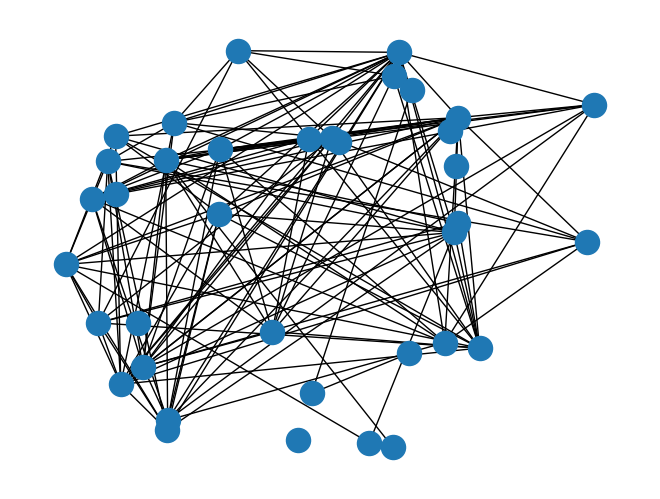

In [144]:
# using node attributes

nx.draw_random(EliteNet)

### Exercise 1 
<div class="alert-success">

1. Plot a colored version of the nodes based on attributes of the previous plot.
2. Plot using Pyvis.
3. Export the network: **nx.write_graphml(EliteNet, os.path.join("graphdata","EliteNet.graphml"),encoding='utf-8')**
4. Open the exported network in R and Gephi. Plot the graphs.    
</div>

# Case: Trade among countries

Let me use some information about trade among countries from the [World Bank](https://wits.worldbank.org/gptad/library.aspx):

In [ ]:
url = "https://wits.worldbank.org/gptad/library.aspx"
from IPython.display import IFrame
IFrame(url, 900,500)

I have previously pre processed the data. Let me open the file with _inforce_ agreements:

In [156]:
tradeDF=pd.read_pickle(os.path.join("graphdata","tradeData_forGraph.pkl"))
tradeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Common Name      252 non-null    object
 1   Membership       252 non-null    object
 2   Type             248 non-null    object
 3   Membership_list  252 non-null    object
 4   year_inforce_ok  252 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 10.0+ KB


The _Common Name_ is the name of the agreement. All countris involved are in a list (_Memembership_list_):

In [155]:
tradeDF.head()

,Common Name,Membership,Type,Membership_list,year_inforce_ok
0,AEC,"Algeria, Angola, Benin, Botswana, Burkina Faso...",Regional/Plurilateral Free Trade Agreement,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",1991
1,Afghanistan - India,"Afghanistan, India",Bilateral Free Trade Agreement,"[Afghanistan, India]",2003
2,Afghanistan - India,"Afghanistan, India",Bilateral Free Trade Agreement,"[Afghanistan, India]",2003
3,Albania - Turkey,"Albania, Turkey",Bilateral Free Trade Agreement,"[Albania, Turkey]",2008
4,Andean Community (CAN),"Bolivia, Colombia, Ecuador, Peru, Venezuela",Customs Union Primary Agreement,"[Bolivia, Colombia, Ecuador, Peru, Venezuela]",1988


The column _Membership_list_ is the one we need to create a network:

In [157]:
tradeDF.Type.value_counts()

Type
Bilateral Free Trade Agreement                146
Association Free Trade Agreement               55
Regional/Plurilateral Free Trade Agreement     33
Customs Union Primary Agreement                 7
Customs Union Accession Agreement               6
Framework Agreement                             1
Name: count, dtype: int64

Let me choose the 'Framework Agreement':

In [176]:
tradeDF.loc[tradeDF.Type=='Framework Agreement',:]

,Common Name,Membership,Type,Membership_list,year_inforce_ok
162,GUUAM,"Azerbaijan, Georgia, Moldova, Uzbekistan, Ukraine",Framework Agreement,"[Azerbaijan, Georgia, Moldova, Uzbekistan, Ukr...",2001


I can make a network with all those nodes. Let me create "edges":

In [163]:
# all the pairs

from itertools import combinations

list(combinations(tradeDF.loc[162,'Membership_list'], 2))

[('Azerbaijan', 'Georgia'),
 ('Azerbaijan', 'Moldova'),
 ('Azerbaijan', 'Uzbekistan'),
 ('Azerbaijan', 'Ukraine'),
 ('Georgia', 'Moldova'),
 ('Georgia', 'Uzbekistan'),
 ('Georgia', 'Ukraine'),
 ('Moldova', 'Uzbekistan'),
 ('Moldova', 'Ukraine'),
 ('Uzbekistan', 'Ukraine')]

All the pairs above represent nodes and edges, then:

In [164]:
import networkx as nx

Framework_Agreement_Net = nx.Graph(combinations(tradeDF.loc[162,'Membership_list'], 2))

In [166]:
# see edges
Framework_Agreement_Net.edges()

EdgeView([('Azerbaijan', 'Georgia'), ('Azerbaijan', 'Moldova'), ('Azerbaijan', 'Uzbekistan'), ('Azerbaijan', 'Ukraine'), ('Georgia', 'Moldova'), ('Georgia', 'Uzbekistan'), ('Georgia', 'Ukraine'), ('Moldova', 'Uzbekistan'), ('Moldova', 'Ukraine'), ('Uzbekistan', 'Ukraine')])

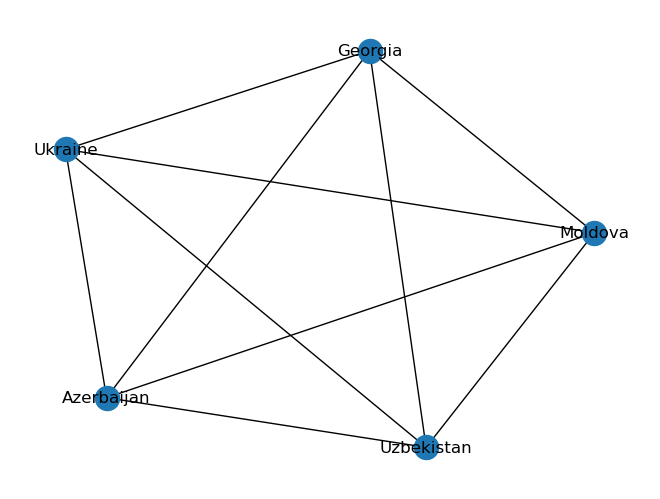

In [167]:
#draw the graph
nx.draw(Framework_Agreement_Net, with_labels=True)

In [177]:
tradeDF.loc[tradeDF.Type=='Customs Union Accession Agreement',:]

,Common Name,Membership,Type,Membership_list,year_inforce_ok
67,EC (10) Enlargement,"Belgium, Denmark, France, Germany, Ireland, It...",Customs Union Accession Agreement,"[Belgium, Denmark, France, Germany, Ireland, I...",1981
68,EC (12) Enlargement,"Belgium, Denmark, France, Germany, Greece, Ire...",Customs Union Accession Agreement,"[Belgium, Denmark, France, Germany, Greece, Ir...",1986
69,EC (15) Enlargement,"Belgium, Denmark, France, Germany, Greece, Ire...",Customs Union Accession Agreement,"[Belgium, Denmark, France, Germany, Greece, Ir...",1995
70,EC (25) Enlargement,"Austria, Belgium, Denmark, Germany, Greece, Fi...",Customs Union Accession Agreement,"[Austria, Belgium, Denmark, Germany, Greece, F...",2004
71,EC (27) Enlargement,"Austria, Belgium, Czech Republic, Cyprus, Denm...",Customs Union Accession Agreement,"[Austria, Belgium, Czech Republic, Cyprus, Den...",2007
72,EC (9) Enlargement,"Belgium, Denmark, France, Germany, Ireland, It...",Customs Union Accession Agreement,"[Belgium, Denmark, France, Germany, Ireland, I...",1973


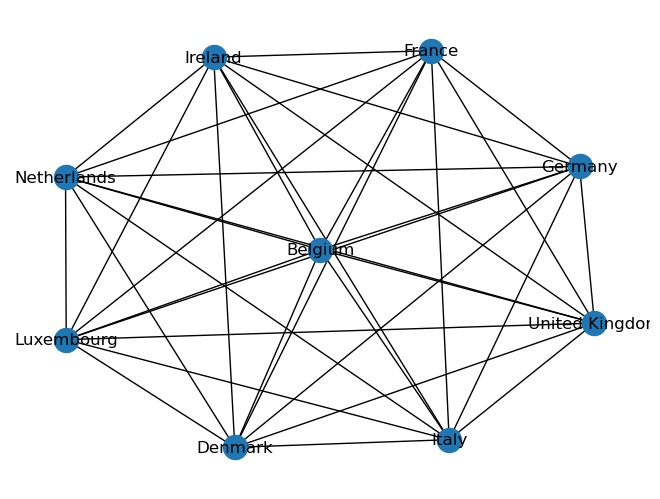

In [178]:
Accession_Agreement_Net_1973 = nx.Graph(combinations(tradeDF.loc[72,'Membership_list'], 2))
nx.draw(Accession_Agreement_Net_1973, with_labels=True)

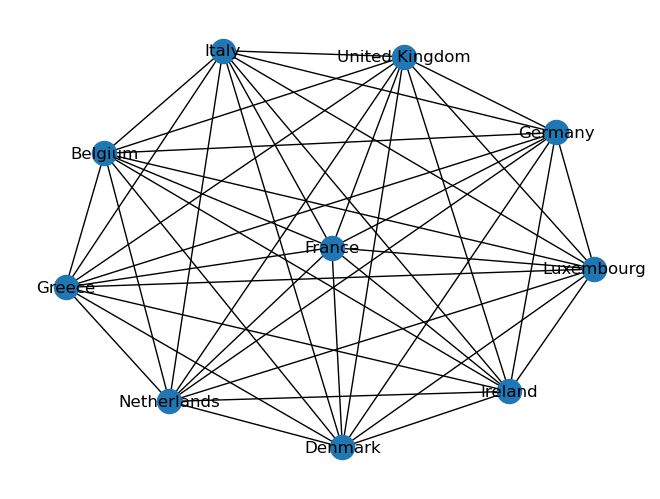

In [179]:
Accession_Agreement_Net_1981 = nx.Graph(combinations(tradeDF.loc[67,'Membership_list'], 2))
nx.draw(Accession_Agreement_Net_1981, with_labels=True)

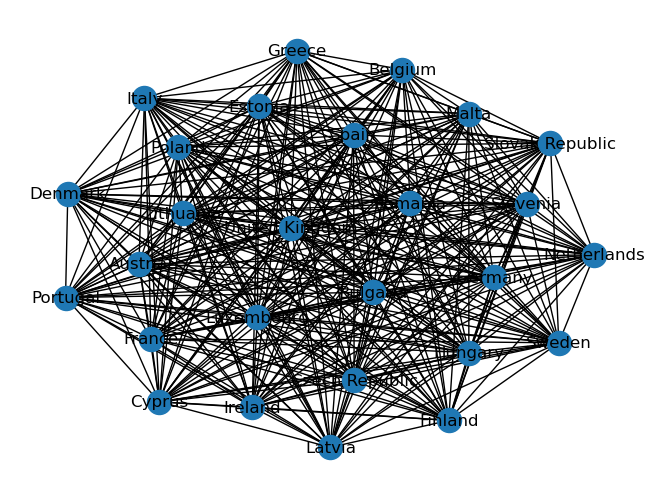

In [180]:
Accession_Agreement_Net_2007 = nx.Graph(combinations(tradeDF.loc[71,'Membership_list'], 2))
nx.draw(Accession_Agreement_Net_2007, with_labels=True)

In [192]:
tradeDF[tradeDF.Type=='Customs Union Primary Agreement' ]

,Common Name,Membership,Type,Membership_list,year_inforce_ok
4,Andean Community (CAN),"Bolivia, Colombia, Ecuador, Peru, Venezuela",Customs Union Primary Agreement,"[Bolivia, Colombia, Ecuador, Peru, Venezuela]",1988
32,CARICOM,"Antigua and Barbuda, Bahamas, Barbados, Belize...",Customs Union Primary Agreement,"[Antigua and Barbuda, Bahamas, Barbados, Beliz...",1973
73,EC (Treaty of Rome),"Austria, Belgium, Denmark, Germany, Greece, Fi...",Customs Union Primary Agreement,"[Austria, Belgium, Denmark, Germany, Greece, F...",1958
113,EC - Turkey,"Austria, Belgium, Denmark, Finland, France, Ge...",Customs Union Primary Agreement,"[Austria, Belgium, Denmark, Finland, France, G...",1996
148,Eurasian Economic Community (EAEC),"Belarus, Kazakhstan, Kyrgyz Republic, Russia, ...",Customs Union Primary Agreement,"[Belarus, Kazakhstan, Kyrgyz Republic, Russia,...",1997
202,MERCOSUR,"Argentina, Brazil, Paraguay, Uruguay",Customs Union Primary Agreement,"[Argentina, Brazil, Paraguay, Uruguay]",1991
231,Southern African Customs Union (SACU),"Botswana, Lesotho, Namibia, South Africa, Swaz...",Customs Union Primary Agreement,"[Botswana, Lesotho, Namibia, South Africa, Swa...",2004


In [193]:
tradeDF[tradeDF.Type=='Regional/Plurilateral Free Trade Agreement' ]

,Common Name,Membership,Type,Membership_list,year_inforce_ok
0,AEC,"Algeria, Angola, Benin, Botswana, Burkina Faso...",Regional/Plurilateral Free Trade Agreement,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",1991
12,ASEAN (AFTA),"Brunei Darussalam, Indonesia, Malaysia, Philip...",Regional/Plurilateral Free Trade Agreement,"[Brunei Darussalam, Indonesia, Malaysia, Phili...",1992
13,ASEAN - Australia - New Zealand,"Brunei Darussalam, Indonesia, Malaysia, Philip...",Regional/Plurilateral Free Trade Agreement,"[Brunei Darussalam, Indonesia, Malaysia, Phili...",2009
15,ASEAN - Korea,"Brunei Darussalam, Cambodia, Indonesia, Laos, ...",Regional/Plurilateral Free Trade Agreement,"[Brunei Darussalam, Cambodia, Indonesia, Laos,...",2006
33,CARICOM - Cuba,"Antigua and Barbuda, Bahamas, Barbados, Belize...",Regional/Plurilateral Free Trade Agreement,"[Antigua and Barbuda, Bahamas, Barbados, Beliz...",2001
34,CARICOM - Dominican Republic,"Antigua and Barbuda, Barbados, Belize, Dominic...",Regional/Plurilateral Free Trade Agreement,"[Antigua and Barbuda, Barbados, Belize, Domini...",1999
36,CEFTA 2006,"Albania, Bosnia and Herzegovina, Bulgaria, Cro...",Regional/Plurilateral Free Trade Agreement,"[Albania, Bosnia and Herzegovina, Bulgaria, Cr...",2007
37,CEFTA Accession of Croatia,"Bulgaria, Croatia, Czech Republic, Hungary, Po...",Regional/Plurilateral Free Trade Agreement,"[Bulgaria, Croatia, Czech Republic, Hungary, P...",2003
38,CEMAC,"Cameroon, Central African Republic, Congo, Gab...",Regional/Plurilateral Free Trade Agreement,"[Cameroon, Central African Republic, Congo, Ga...",1999
40,Central America - Mexico,"El Salvador, Guatemala, Honduras, Mexico",Regional/Plurilateral Free Trade Agreement,"[El Salvador, Guatemala, Honduras, Mexico]",2001


Let's do that for the other treaty:

In [ ]:
trade_test2 = nx.Graph(combinations(tradeDF.loc[14,'Membership_list'], 2))
nx.draw(trade_test2, with_labels=True)

As you see, each treaty can be represented as a full connected network. That is, the whole data is a collection of networks. Then, let's make a network of networks:

In [168]:
# weighted MultiGraph
Multi_test = nx.MultiGraph()
for countries_Agreement in tradeDF.loc[[4,14],'Membership_list']:
    allPairs=combinations(countries_Agreement, 2)
    for country1,country2 in allPairs:
        Multi_test.add_edge(country1,country2,weight=1)

This is what you get:

In [169]:
Multi_test.edges(data=True)

MultiEdgeDataView([('Bolivia', 'Colombia', {'weight': 1}), ('Bolivia', 'Ecuador', {'weight': 1}), ('Bolivia', 'Peru', {'weight': 1}), ('Bolivia', 'Venezuela', {'weight': 1}), ('Colombia', 'Ecuador', {'weight': 1}), ('Colombia', 'Peru', {'weight': 1}), ('Colombia', 'Venezuela', {'weight': 1}), ('Ecuador', 'Peru', {'weight': 1}), ('Ecuador', 'Venezuela', {'weight': 1}), ('Peru', 'Venezuela', {'weight': 1}), ('Brunei Darussalam', 'Cambodia', {'weight': 1}), ('Brunei Darussalam', 'Indonesia', {'weight': 1}), ('Brunei Darussalam', 'Laos', {'weight': 1}), ('Brunei Darussalam', 'Malaysia', {'weight': 1}), ('Brunei Darussalam', 'Myanmar', {'weight': 1}), ('Brunei Darussalam', 'Philippines', {'weight': 1}), ('Brunei Darussalam', 'Singapore', {'weight': 1}), ('Brunei Darussalam', 'Thailand', {'weight': 1}), ('Brunei Darussalam', 'Vietnam', {'weight': 1}), ('Brunei Darussalam', 'China', {'weight': 1}), ('Cambodia', 'Indonesia', {'weight': 1}), ('Cambodia', 'Laos', {'weight': 1}), ('Cambodia', 'Ma

In [170]:
# easier to see:
[(a,b,c) for a,b,c in Multi_test.edges(data=True)]

[('Bolivia', 'Colombia', {'weight': 1}),
 ('Bolivia', 'Ecuador', {'weight': 1}),
 ('Bolivia', 'Peru', {'weight': 1}),
 ('Bolivia', 'Venezuela', {'weight': 1}),
 ('Colombia', 'Ecuador', {'weight': 1}),
 ('Colombia', 'Peru', {'weight': 1}),
 ('Colombia', 'Venezuela', {'weight': 1}),
 ('Ecuador', 'Peru', {'weight': 1}),
 ('Ecuador', 'Venezuela', {'weight': 1}),
 ('Peru', 'Venezuela', {'weight': 1}),
 ('Brunei Darussalam', 'Cambodia', {'weight': 1}),
 ('Brunei Darussalam', 'Indonesia', {'weight': 1}),
 ('Brunei Darussalam', 'Laos', {'weight': 1}),
 ('Brunei Darussalam', 'Malaysia', {'weight': 1}),
 ('Brunei Darussalam', 'Myanmar', {'weight': 1}),
 ('Brunei Darussalam', 'Philippines', {'weight': 1}),
 ('Brunei Darussalam', 'Singapore', {'weight': 1}),
 ('Brunei Darussalam', 'Thailand', {'weight': 1}),
 ('Brunei Darussalam', 'Vietnam', {'weight': 1}),
 ('Brunei Darussalam', 'China', {'weight': 1}),
 ('Cambodia', 'Indonesia', {'weight': 1}),
 ('Cambodia', 'Laos', {'weight': 1}),
 ('Cambodia',

However, notice that we have repeated edges, then we can create a new graph where the weight tells us in hoe many agreements a pair of countries is together:

In [189]:
G_test = nx.Graph() # new graph
for country1,country2,attributes in Multi_test.edges(data=True):
    weightNow = attributes['weight'] 
    if G_test.has_edge(country1,country2):
        G_test[country1][country2]['weight'] += 1
    else:
        G_test.add_edge(country1,country2, weight=weightNow)

You get:

In [190]:
G_test.edges(data=True)

EdgeDataView([('Bolivia', 'Colombia', {'weight': 1}), ('Bolivia', 'Ecuador', {'weight': 1}), ('Bolivia', 'Peru', {'weight': 1}), ('Bolivia', 'Venezuela', {'weight': 1}), ('Colombia', 'Ecuador', {'weight': 1}), ('Colombia', 'Peru', {'weight': 1}), ('Colombia', 'Venezuela', {'weight': 1}), ('Ecuador', 'Peru', {'weight': 1}), ('Ecuador', 'Venezuela', {'weight': 1}), ('Peru', 'Venezuela', {'weight': 1}), ('Brunei Darussalam', 'Cambodia', {'weight': 1}), ('Brunei Darussalam', 'Indonesia', {'weight': 1}), ('Brunei Darussalam', 'Laos', {'weight': 1}), ('Brunei Darussalam', 'Malaysia', {'weight': 1}), ('Brunei Darussalam', 'Myanmar', {'weight': 1}), ('Brunei Darussalam', 'Philippines', {'weight': 1}), ('Brunei Darussalam', 'Singapore', {'weight': 1}), ('Brunei Darussalam', 'Thailand', {'weight': 1}), ('Brunei Darussalam', 'Vietnam', {'weight': 1}), ('Brunei Darussalam', 'China', {'weight': 1}), ('Cambodia', 'Indonesia', {'weight': 1}), ('Cambodia', 'Laos', {'weight': 1}), ('Cambodia', 'Malaysi

In [191]:
# easier to see:
[(a,b,c) for a,b,c in G_test.edges(data=True)]

[('Bolivia', 'Colombia', {'weight': 1}),
 ('Bolivia', 'Ecuador', {'weight': 1}),
 ('Bolivia', 'Peru', {'weight': 1}),
 ('Bolivia', 'Venezuela', {'weight': 1}),
 ('Colombia', 'Ecuador', {'weight': 1}),
 ('Colombia', 'Peru', {'weight': 1}),
 ('Colombia', 'Venezuela', {'weight': 1}),
 ('Ecuador', 'Peru', {'weight': 1}),
 ('Ecuador', 'Venezuela', {'weight': 1}),
 ('Peru', 'Venezuela', {'weight': 1}),
 ('Brunei Darussalam', 'Cambodia', {'weight': 1}),
 ('Brunei Darussalam', 'Indonesia', {'weight': 1}),
 ('Brunei Darussalam', 'Laos', {'weight': 1}),
 ('Brunei Darussalam', 'Malaysia', {'weight': 1}),
 ('Brunei Darussalam', 'Myanmar', {'weight': 1}),
 ('Brunei Darussalam', 'Philippines', {'weight': 1}),
 ('Brunei Darussalam', 'Singapore', {'weight': 1}),
 ('Brunei Darussalam', 'Thailand', {'weight': 1}),
 ('Brunei Darussalam', 'Vietnam', {'weight': 1}),
 ('Brunei Darussalam', 'China', {'weight': 1}),
 ('Cambodia', 'Indonesia', {'weight': 1}),
 ('Cambodia', 'Laos', {'weight': 1}),
 ('Cambodia',

See both networks as one:

In [ ]:
nx.draw(G_test, with_labels=True)

We can use the attribute for plotting:

In [ ]:
# use the edge attributes
# add labels to edges

weight_values = nx.get_edge_attributes(G_test,'weight') # recovering 'weights'
pos = nx.spring_layout(G_test) # position of the nodes
nx.draw(G_test,
        pos, # using "position"
        with_labels=True)
# adding labels
final_dG=nx.draw_networkx_edge_labels(G_test,pos,edge_labels=weight_values)

Let's redo this for the whole data (every agreement):

In [ ]:
Multi_all = nx.MultiGraph()
for countries_Agreement in tradeDF.loc[:,'Membership_list']:
    allPairs=combinations(countries_Agreement, 2)
    for country1,country2 in allPairs:
        Multi_all.add_edge(country1,country2,weight=1)


G_all = nx.Graph() # new graph
for country1,country2,attributes in Multi_all.edges(data=True):
    weightNow = attributes['weight'] 
    if G_all.has_edge(country1,country2):
        G_all[country1][country2]['weight'] += 1
    else:
        G_all.add_edge(country1,country2, weight=weightNow)

We have these amount of nodes and edges:

In [ ]:
len(G_all.nodes()),len(G_all.edges())

We are not supposed to have isolates:

In [ ]:
list(nx.isolates(G_all))

There should not be self loops:

In [ ]:
nx.number_of_selfloops(G_all)

In [ ]:
# which are they?
[e for e in nx.selfloop_edges(G_all)]

We may remove those edges:

In [ ]:
G_all.remove_edges_from(nx.selfloop_edges(G_all))

We can use the edges to create a dataframe:

In [ ]:
tradeEdges_DF=nx.to_pandas_edgelist(G_all)
tradeEdges_DF

You can see a ranking of countries according to mutual interaction:

In [ ]:
tradeEdges_DF.sort_values(by=['weight'],ascending=False)

In [ ]:
# here too:
tradeEdges_DF.weight.value_counts()

A barplot of the previous table:

In [ ]:
tradeEdges_DF.weight.value_counts().plot(kind='bar')

Let's try some visuals:

In [ ]:
nx.draw_random(G_all)

In [ ]:
nx.draw_kamada_kawai(G_all)

In [ ]:
labelsNodes={a:a for a in G_all.nodes()}
nx.set_node_attributes(G_all,labelsNodes,'label')

In [ ]:
labelsEdges={e:str(w) for e,w in nx.get_edge_attributes(G_all,'weight').items()}
nx.set_edge_attributes(G_all,labelsEdges,'label')

In [ ]:
# G_allvis = Network('800px', '800px',notebook=True,cdn_resources='remote',directed=False)
# G_allvis.from_nx(G_all.copy())
# G_allvis.show('G_allvis.html')

Time to save:

In [ ]:
nx.write_graphml(G_all, os.path.join("graphdata","trade_graph.graphml"),encoding='utf-8')

In [ ]:
<div class="alert alert-danger">
  <strong>CHALLENGE!</strong> 
   <br> * Use R to plot the countries whose fragility increased, decreased, or kept the the same the last 10 years.
</div>